In [12]:
# define some necessary packages
import os
import random
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import load_workbook
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib

In [33]:
from openpyxl import load_workbook

data = pd.read_excel('column with code.xlsx', engine='openpyxl')
data.head()
X = data.iloc[:, :12]
y = data.loc[:, 'Vn']

print(X.shape)
print(y.shape)

(168, 12)
(168,)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
model = xgb.XGBRegressor(n_estimators=122
                                 ,max_depth=6
                             ,random_state=90
                        ,learning_rate=0.07
                        ,colsample_bytree=0.7
                             ,subsample=0.8)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.07, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=122, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=90,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
data.head()

,a,b,h,fyv,pv,s,fc,pst,fyt,p,λ,n,Vn,VACI(KN),VGB(KN),VBS,Vn/VACI,Vn/VGB,Vn/VBS
0,910.0,230.0,410.0,413.70,0.28,89.0,34.9,3.01,441.28,533.76,1.181818,0.162184,324.00,191.250896,233.455968,286.144923,1.694110,1.387842,1.132293
1,1200.0,350.0,350.0,500.00,0.13,125.0,29.2,2.05,320.00,1251.95,1.846154,0.350000,353.30,218.371896,263.851859,377.714802,1.617882,1.339009,0.935362
2,910.0,410.0,230.0,413.70,0.31,89.0,34.9,3.01,441.28,533.76,2.219512,0.162184,265.00,165.918578,227.972736,264.755742,1.597169,1.162420,1.000923
3,2950.0,460.0,460.0,468.86,0.17,305.0,21.1,2.53,441.30,667.20,3.406467,0.149437,314.92,238.621800,358.613842,371.169247,1.319745,0.878159,0.848454
4,910.0,310.0,310.0,414.00,0.09,210.0,29.9,2.44,462.00,288.00,1.596491,0.100230,214.00,124.723812,206.711363,191.088993,1.715791,1.035260,1.119897


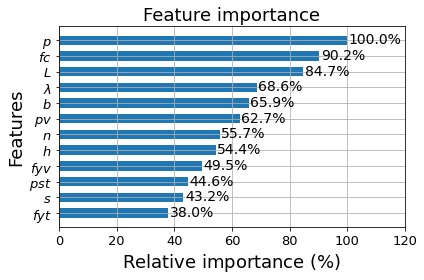

In [26]:
from sklearn.inspection import permutation_importance
feature_names = [r'$L$', r'$b$', r'$h$', r'$fyv$', r'$pv$', r'$s$', r'$fc$',
                 r'$pst$', r'$fyt$', r'$p$', r'$λ$', r'$n$']

model.importance_type = 'weight'
feature_importance = model.feature_importances_

plt.figure()

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.barh (pos, feature_importance[sorted_idx], 0.6, align='center',)
plt.yticks(pos, np.array(feature_names)[sorted_idx], style='italic')
plt.yticks(rotation=360)

for x, y in enumerate(feature_importance[sorted_idx]):
	plt.text(y + 0.5, x + 0.3, '%s' % '{:.1%}'.format(y/100), fontsize=14)

plt.xlabel('Relative importance ($\%$)', fontsize=18)
plt.ylabel('Features', fontsize=18)
plt.title('Feature importance', fontsize=18)
plt.tick_params(labelsize=13)
plt.xlim([0, 120])
plt.grid()
plt.tight_layout()
plt.savefig("./picture/feature importance.png",dpi=1000, bbox_inches = 'tight')
plt.show()

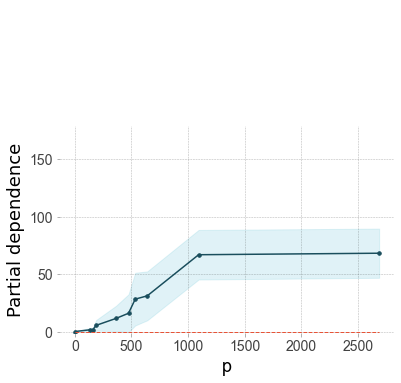

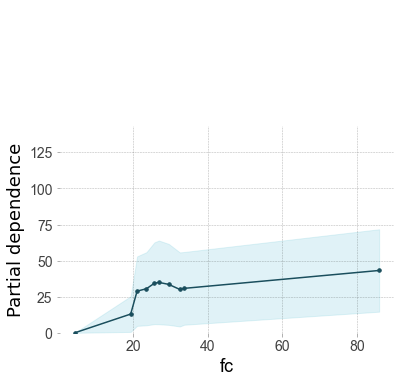

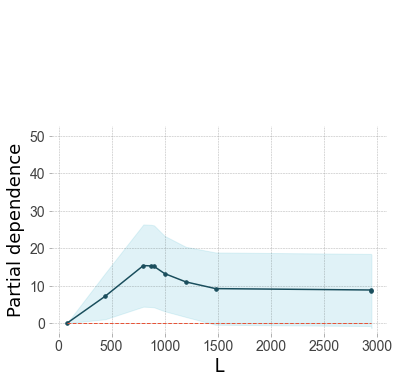

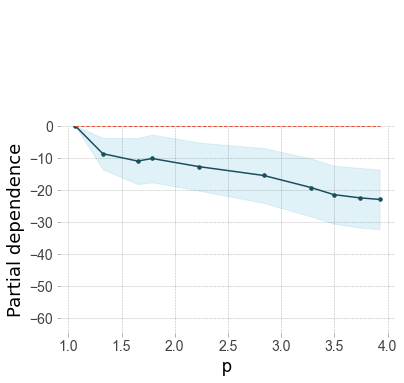

In [37]:
from pdpbox import pdp

x = ['a', 'b', 'h', 'fyv', 'pv', 's', 'fc', 'pst', 'fyt', 'p', 'λ', 'n']

feature = 'p'
pdp_goals = pdp.pdp_isolate(model = model, dataset = X_train, model_features = x, feature = feature)
pdp.pdp_plot(pdp_goals, feature, figsize=(6.0, 6.0), plot_params = {'title': None, 'subtitle': None})
plt.tick_params(labelsize=14)
plt.xlabel('p', fontsize=18)
plt.ylabel('Partial dependence', fontsize=18)
plt.savefig("./picture/feature importance p.png",dpi=1000, bbox_inches = 'tight')

feature = 'fc'
pdp_goals = pdp.pdp_isolate(model = model, dataset = X_train, model_features = x, feature = feature)
pdp.pdp_plot(pdp_goals, feature, figsize=(6.0, 6.0), plot_params = {'title': None, 'subtitle': None})
plt.tick_params(labelsize=14)
plt.xlabel('fc', fontsize=18)
plt.ylabel('Partial dependence', fontsize=18)
plt.savefig("./picture/feature importance fc.png",dpi=1000, bbox_inches = 'tight')

feature = 'a'
pdp_goals = pdp.pdp_isolate(model = model, dataset = X_train, model_features = x, feature = feature)
pdp.pdp_plot(pdp_goals, feature, figsize=(6.0, 6.0), plot_params = {'title': None, 'subtitle': None})
plt.tick_params(labelsize=14)
plt.xlabel('L', fontsize=18)
plt.ylabel('Partial dependence', fontsize=18)
plt.savefig("./picture/feature importance L.png",dpi=1000, bbox_inches = 'tight')

feature = 'λ'
pdp_goals = pdp.pdp_isolate(model = model, dataset = X_train, model_features = x, feature = feature)
pdp.pdp_plot(pdp_goals, feature, figsize=(6.0, 6.0), plot_params = {'title': None, 'subtitle': None})
plt.tick_params(labelsize=14)
plt.xlabel('p', fontsize=18)
plt.ylabel('Partial dependence', fontsize=18)
plt.savefig("./picture/feature importance lamda.png",dpi=1000, bbox_inches = 'tight')

plt.show()
